In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/predicting-a-pulsar-star/pulsar_stars.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('/kaggle/input/predicting-a-pulsar-star/pulsar_stars.csv')

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
df.shape

(17898, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [7]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [8]:
mapDict = {
    0:'Not Pulsar Star',
    1:'Pulsar Star'
}

In [9]:
df['target'] = df['target_class'].map(mapDict)

In [10]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,Not Pulsar Star
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,Not Pulsar Star
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,Not Pulsar Star
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,Not Pulsar Star
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,Not Pulsar Star


## Visualizing all the features

<Figure size 1080x1080 with 0 Axes>

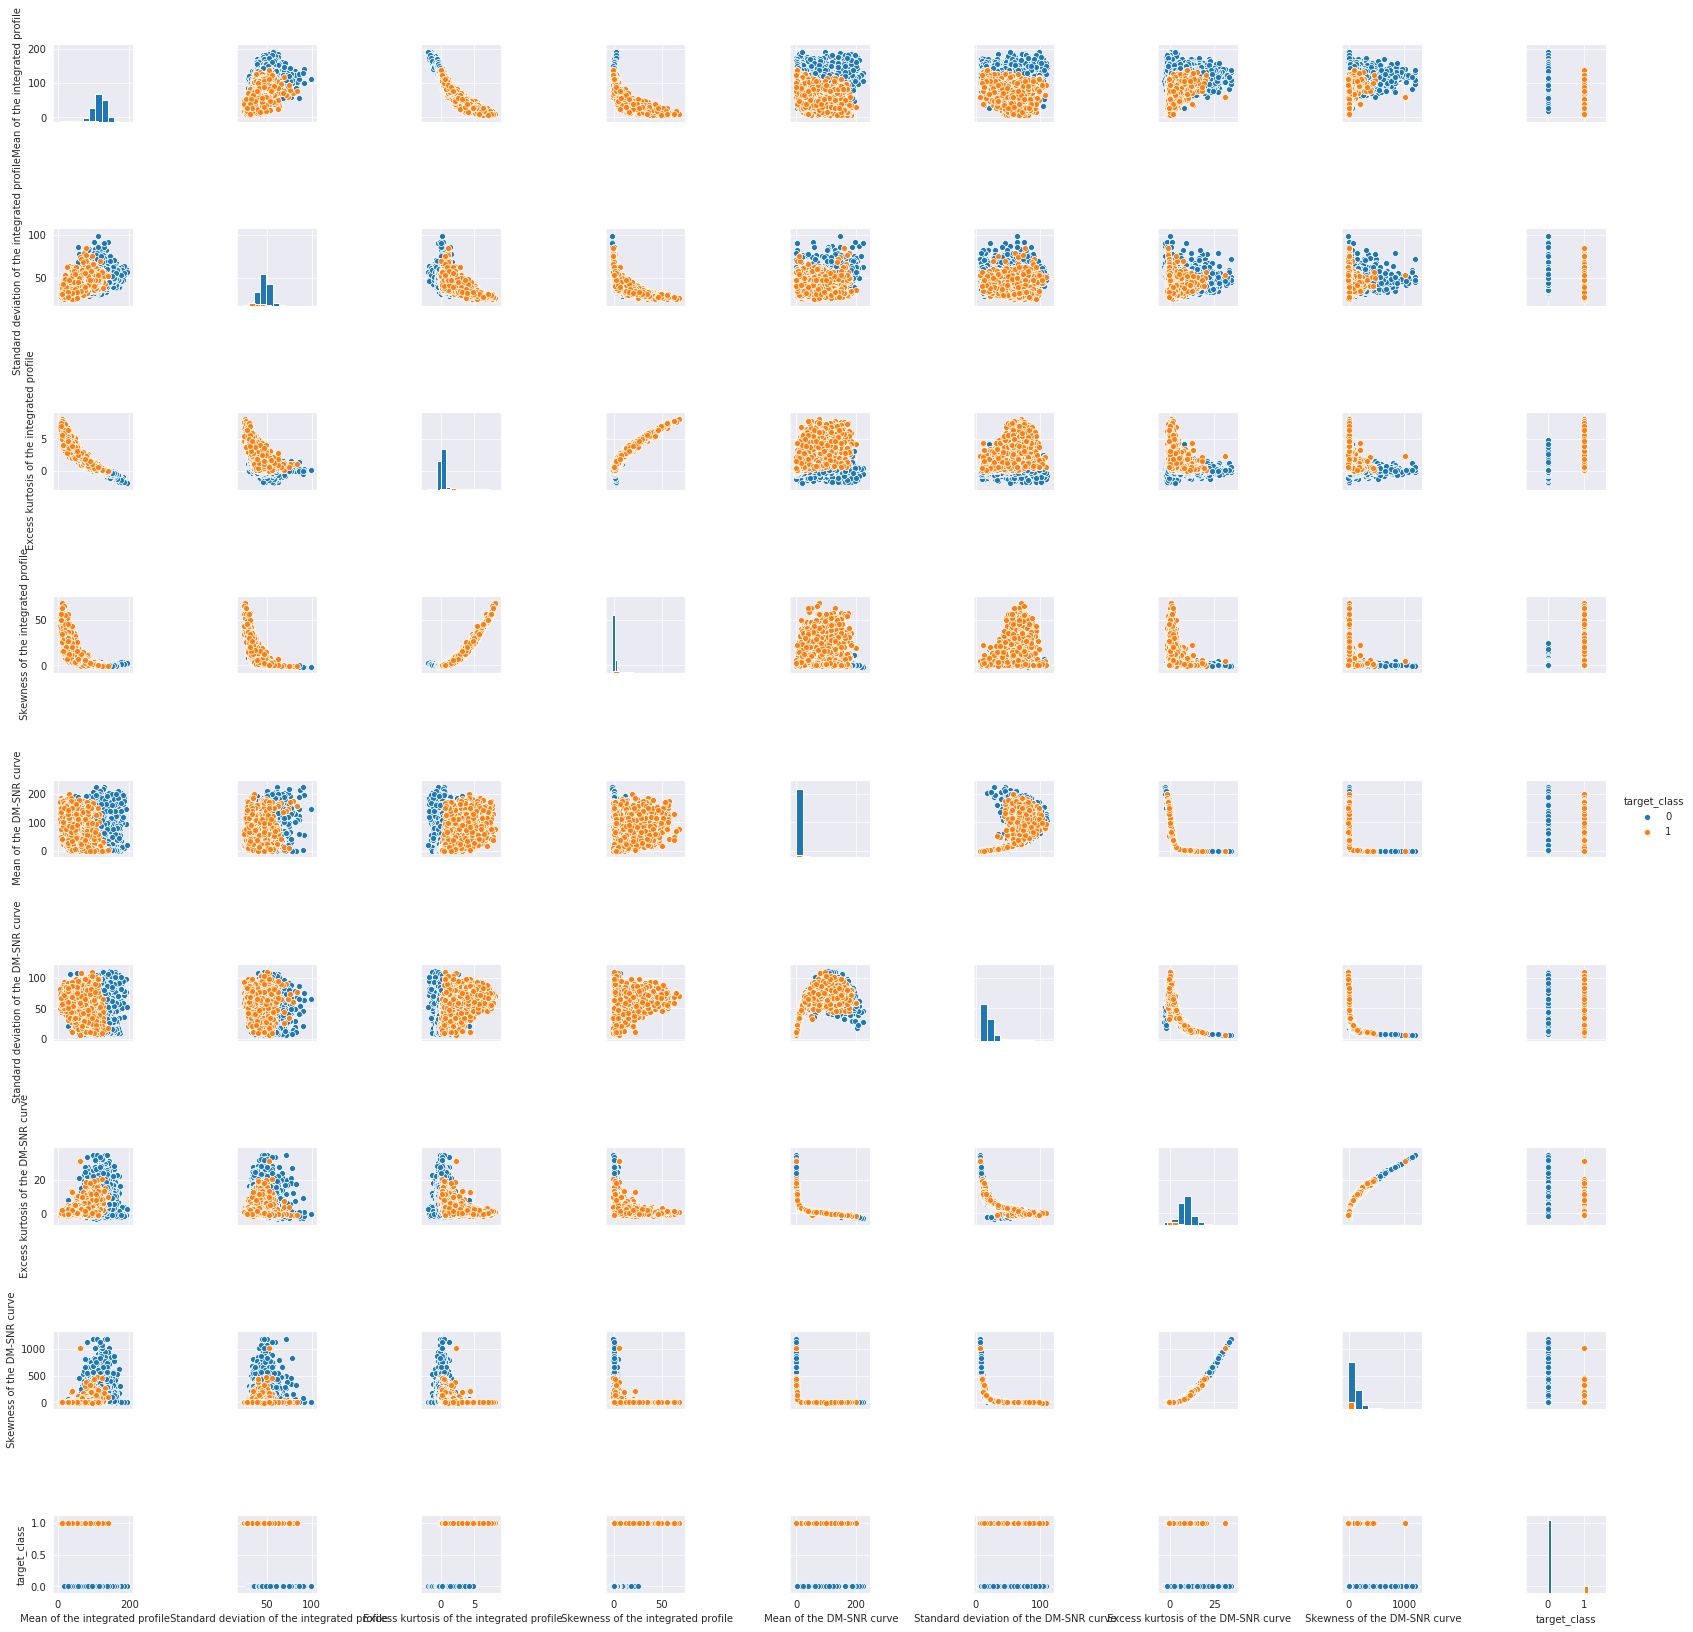

In [11]:
plt.figure(figsize=(15,15))
sns.pairplot(df, diag_kind='hist', hue ='target_class')

## Plotting features that show correlation

In [12]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class', 'target'],
      dtype='object')

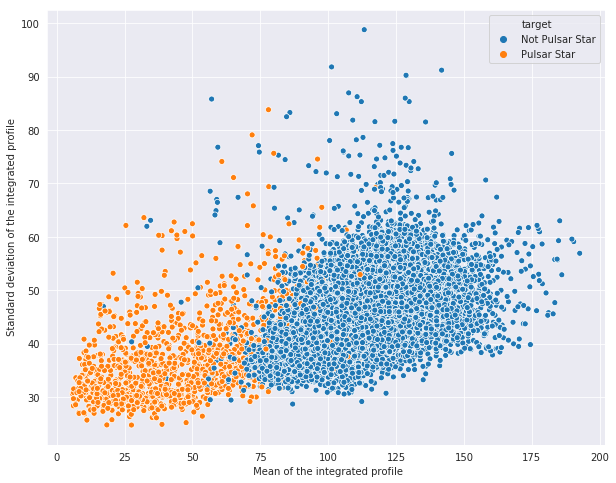

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=' Mean of the integrated profile',y=' Standard deviation of the integrated profile',hue='target',data=df)

- Distribution on x-axis shows varience in data and target is almost linearly seperable
- Mean of the integrated profile provide great correlation to target.
- Standard deviation of the integrated profile show little correlation

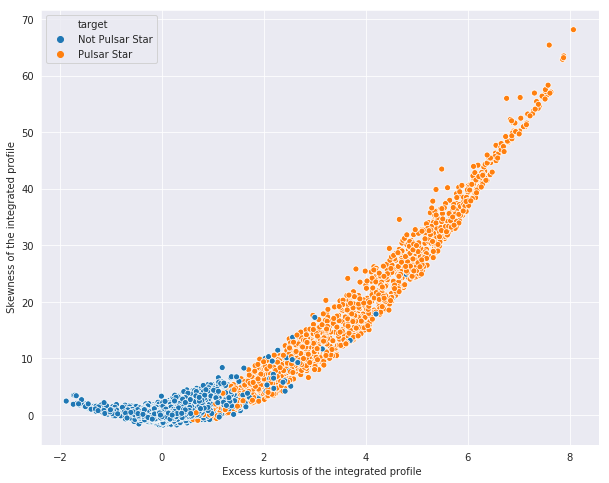

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=' Excess kurtosis of the integrated profile',y=' Skewness of the integrated profile',hue='target',data=df)

- They are linearly related to each other.
- Both the features show high correlation to target.

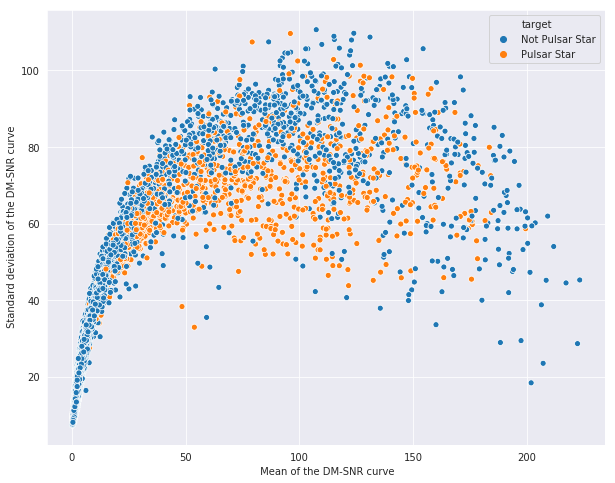

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=' Mean of the DM-SNR curve',y=' Standard deviation of the DM-SNR curve',hue='target',data=df)

- Distribution is diverse, but you cannot seperate target on a linear plane.
- Both provide moderate correlation to target.

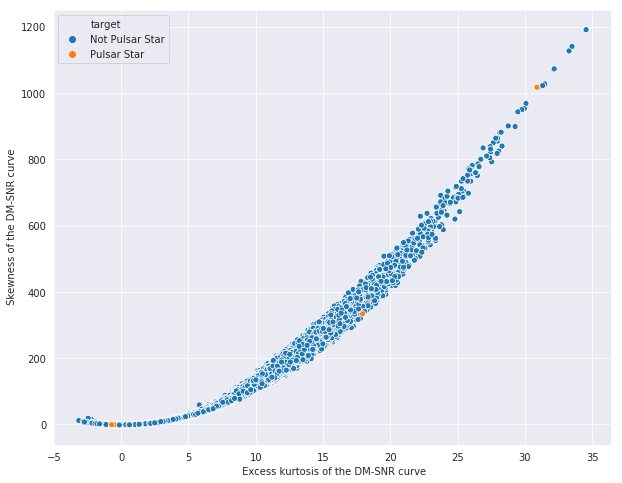

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=' Excess kurtosis of the DM-SNR curve',y=' Skewness of the DM-SNR curve',hue='target',data=df)

- They are linearly related to each other.
- Very few Data points depicting Pulsar Star class.
- Provide little to no correlation to target.

## Confirming insights using correlation matrix

### Calculaing correlation matrix of features to target

In [17]:
corr = df.corr()
corr

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


### Plotting heat map to show scale of correlation

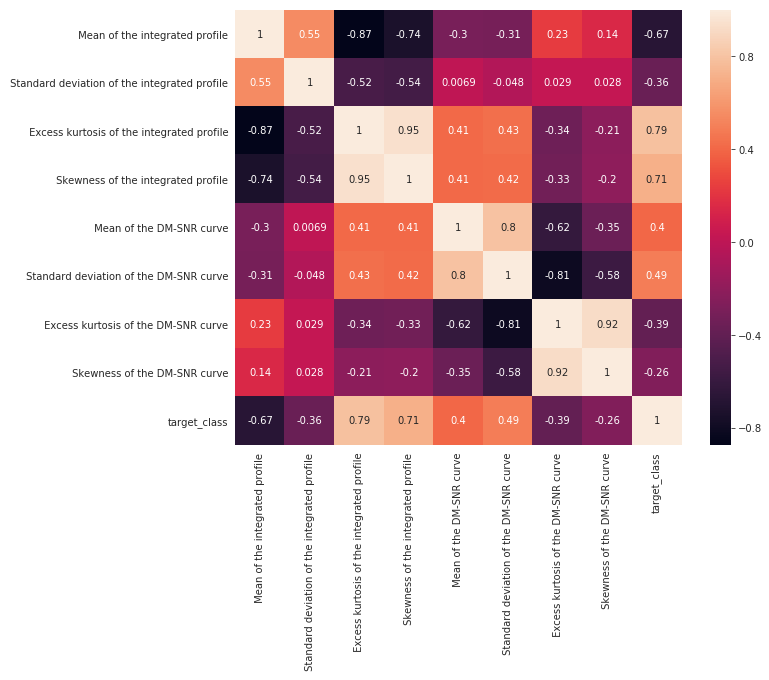

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

**Insights confirmed by correlation matrix:**  
1. Mean of the integrated profile shows great correlation.
2. Standard deviation of the integrated profile show little correlation.
3. Excess kurtosis of the integrated profile and Skewness of the integrated profile show high correlation to target.
4. Mean of the DM-SNR curve and Standard deviation of the DM-SNR curve provide moderate correlation to target.
5. Excess kurtosis of the DM-SNR curve and Skewness of the DM-SNR curve provide little to no correlation to target.

**CAUTION:**
Always remember "Correlation does not mean Causation"